<h1> Variables aleatorias </h1>

<strong>Definición</strong> Una variable aleatoria (v.a.) es una aplicación $X:\Omega \to \mathbb{R}$, donde $\Omega$ es el espacio muestral de un espacio de probabilidad $(\Omega,\Sigma,P)$. 

* El espacio de probabilidad no es más que la formalización matemática precisa de un experimento aleatorio, que podemos denotar por $\mathcal{E}$. Los resultados elementales de dicho experimento son los elementos del espacio muestral $\Omega$
* La idea de introducir variables aleatorias es que, una vez realizado el experimento aleatorio $\mathcal{E}$, habremos obtenido un elemento $w\in \Omega$ y la variable -que denotamos por $X$- nos sirve para transformar dicho resultado en un valor numérico $X(w)$. De este modo, podemos hacernos preguntas de tipo cuantitativo relacionadas con la probabilidad de que dicho valor, $X(w)$, pertenezca a cierto intervalo numérico. 
* Estas preguntas tendrán respuestas en términos de la medida de probabilidad, $P$, y su solución tendrá a menudo un enorme valor científico. 


Hay varios tipos de v.a. La forma más sencilla de clasificarlas es distinguir si el conjunto de posibles valores de la variable, $X(\Omega)$, es  (o no es) un subconjunto discreto de la recta numérica:

<strong> Definición </strong> La v.a. $X$ se dice:

* <strong>finita</strong> si $X(\Omega)=\{x_1,\cdots,x_n\}$ es un conjunto finito de números reales. 

* <strong>discreta</strong> si $X(\Omega)=\{x_1,\cdots,x_n,\cdots\}$ es una sucesión de números reales (Este caso contiene el anterior, si permitimos que los valores se repitan). 

* <strong>continua</strong> si $X(\Omega)$ contiene un intervalo $]a,b[$ con a<b. 

<h2>Variables aleatorias discretas.</h2>

Vamos a centrarnos en el caso de las variables aleatorias discretas. ¿Cómo se caracterizan matemáticamente? ¿Cómo se definen usando Python? ¿Cómo se trabaja con ellas? ¿Qué aspectos son relevantes para su comprensión y su uso?

Supongamos que la v.a. $X$ toma los valores $X(\Omega)=\{x_1,\cdots,x_n,\cdots\}$. Entonces todas las cuestiones que podamos hacernos sobre dicha variable van a depender de conocer los siguientes valores:
$$p_k=P(X=x_k), \quad k=1,2,\cdots$$
Dichos valores conforman lo que se conoce como <strong>"distribución de probabilidad"</strong> de la v.a. $X$. También se usa el término <strong> función de masa de probabilidad </strong> o pmf de la variable (nosotros diremos, simplemente, <strong> función de probabilidad </strong>  de la v.a. y usaremos la notación $p_X$, de modo que $p_X(x_k)=P(X=x_k)=p_k$ y $P_X(x)=0$ si $x\not\in \{x_1,\cdots,x_n,\cdots\}$)  

* Evidentemente, la pmf satisface que $0\leq p_k\leq 1$ para todo $k\in\{1,2,\cdots\}$ y, además, $$\sum_{k=1}^{\infty}p_k=1.$$ De hecho, cualquier sucesión de valores $p_k$ que verifica las dos propiedades anteriores define la pmf de una v.a. 

* En caso de que la v.a. $X$ sea finita, bastará considerar un número finito de valores $p_k$ que determinarán la pfm de la variable.

* Dos v.a. discretas $X,Y$ se distribuyen igual (o comparten distribución de probabilidades) si poseen la misma función de probabilidad de masas (la notación es, en tal caso: $X\sim Y$).  

Supongamos que $X$ es una v.a. discreta, que toma valores en el conjunto $\{x_1,\cdots,x_n,\cdots \}$. 
Entonces tendremos que 
$$E(X)=\sum_{i=1}^{\infty}x_iP(X=x_i)=\sum_{i=1}^nx_ip_i$$

La <strong>esperanza o valor esperado</strong> es una medida de centralidad, que intenta resumir en un solo valor el comportamiento de la variable -el comportamiento probable o esperado-. 

Por otra parte, la <strong>varianza</strong> (o, mejor aún, la <strong>desviación típica</strong>) es una medida de dispersión, que muestra lo fiable que es $E(X)$ como resumen del comportamiento de la variable $X$: 

$$\sigma_X^2=V(X)=E((X-E(X))^2)=\sum_{i=1}^{\infty}(x_i-E(X))^2p_i; \quad \sigma_X=\sqrt{V(X)}$$

<font color="red"> <strong> Si la v.a. $X$ es finita y toma valores en el conjunto $\{x_1,\cdots,x_n\}$, los cálculos son iguales, cambiando $\infty$ por $n$ </strong> </font> 


<h2> Trabajar en Python con variables aleatorias discretas</h2>

Antes de empezar, conviene cargar los paquetes que podamos necesitar

In [1]:
import pandas as pd # Para trabajar con datos
import numpy as np # Para hacer cálculos numéricos
import matplotlib.pyplot as plt # Para hacer gráficos (no solo estadísticos, también de funciones)
import random # Para generar números aleatorios con una v.a. uniforme [0,1]
from collections import Counter # Para calcular frecuencias
from empiricaldist import Pmf # Para definir distribuciones de probabilidad discretas
from scipy.integrate import quad # Para la aproximación numérica de integrales, cuando sea necesario


<font color="blue"> <strong> 1.  Una lista contiene los números $\{1 , 3 , 7 , 8 , 13 , 15 , 18, 17\}$. 
    Saco un número al azar y me interesa X = ‘Número sacado’. </strong> </font>
* <font color="blue"> <strong> Analiza la variable </font>  <font color="green"> (Es decir: calcula su Pmf, su función de distribución, dibuja ambas funciones, calcula la media, la varianza, la desviación típica y los cuartiles de la v.a.)</strong></font> 

* <font color="blue"><strong> Calcula la probabilidad de que $X$ sea par o menor que 15. </strong></font> 
* <font color="blue"> <strong> Genera una muestra aleatoria simple de tamaño 10000 de esta variable y compara los datos obtenidos -que interpretamos como una variable estadística- con las propiedades de la variable aleatoria. </strong>  </font>

<strong> Solución </strong> Obviamente se trata de una variable discreta que toma valores en el conjunto:

In [3]:
val=np.array([1,3,7,8,13,15,17,18])
val

array([ 1,  3,  7,  8, 13, 15, 17, 18])

Como no nos dan ningún tipo de información adicional, debemos suponer que la
distribución es uniforme. Es decir, si $x_i$ es uno de los valores que aparecen en el vector val, asumimos que $P(X=x_i)=1/8$.

Por tanto el vector de probabilidades asociado es:

In [4]:
prob=np.array([1/8,1/8,1/8,1/8,1/8,1/8,1/8,1/8])
prob

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [5]:
cumsum_prob = np.cumsum(prob)
print("Distribución de probabilidades acumuladas:", cumsum_prob)

Distribución de probabilidades acumuladas: [0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


Obsérvese que <strong> val==h </strong> es un vector del mismo tamaño que val, obtenido de averiguar componente a componente cuál vale <strong> h </strong>, por tanto, como <strong> val </strong>  y <strong> prob</strong>  tienen el mismo tamaño, podemos hacer <strong> prob[val==h]</strong>  para filtrar  la componente de <strong> prob</strong> donde se da la igualdad,
lo cual permite definir la función densidad de probablidad:

In [6]:
def f(x):
    return np.sum(prob[val == x])

In [7]:
f(1)

0.125

In [8]:
f(2/3)

0.0

Resulta muy útil modificar la función f para que esta pueda aplicarse directamente a vectores - de modo que: $$f([x_1,\cdots,x_k])=[f(x_1),\cdots,f(x_k)]$$
(eso facilita, por ejemplo, dibujar f). 

Esto se consigue con la orden siguiente:

In [9]:
f_vec = np.vectorize(f)

In [10]:
f_vec([1,3])

array([0.125, 0.125])

Alternativamente, también podemos programar la vectorización de la función:

In [11]:
def f_vec(val):
    result=[]
    for _ in val:
        result.append(f(_))
    return result

In [12]:
f_vec([1,3])

[0.125, 0.125]

Ahora podemos definir la función de distribución:

In [13]:
# Definimos la función F(x) que calcula la suma acumulada de probabilidades hasta x
def F(x):
    return np.sum(prob[val <= x])

# Vectorize the function F for the entire val range
F_vec = np.vectorize(F)

Ahora pintamos ambas funciones: la función de probabilidad de masas (o densidad de probabilidad) (PMF) y la función de Distribución  (CDF):

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


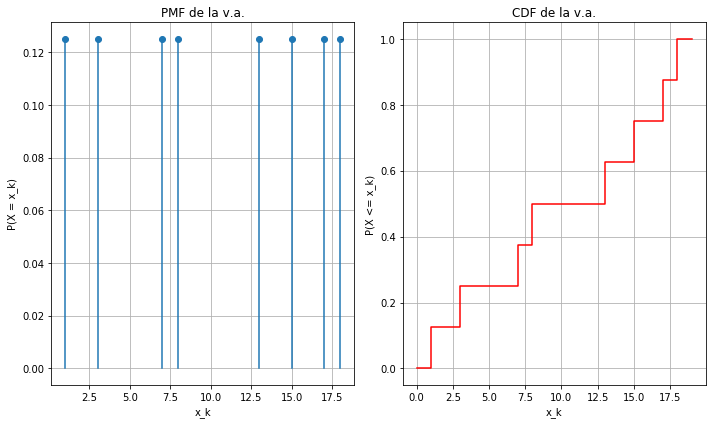

In [17]:
# Dibujamos la densidad de probabilidad (PMF) y la función de distribución (probabilidad acumulada (CDF))
plt.figure(figsize=(10, 6))

# Plot de la  PMF
plt.subplot(1, 2, 1)
plt.stem(val, f_vec(val), basefmt=" ")
plt.title("PMF de la v.a.")
plt.xlabel("x_k")
plt.ylabel("P(X = x_k)")
plt.grid(True)

# Plot de la CDF
plt.subplot(1, 2, 2)
x_vals = np.array([min(val)-1, *val, max(val)+1])  # Auxiliary variable for extended range
plt.step(x_vals, F_vec(x_vals), where='post', color='r', linestyle='-')
plt.title("CDF de la v.a.")
plt.xlabel("x_k")
plt.ylabel("P(X <= x_k)")
plt.grid(True)

# Mostramos los gráficos:
plt.tight_layout()
plt.show()


Ahora podemos calcular media, varianza, etc. de la v.a. X. 



In [15]:
# Cálculo de la media (o esperanza)
media_X = np.sum(val * f_vec(val))
print("Media :", media_X)

# Cálculo de la varianza 
var_X = np.sum((val - media_X)**2 * f_vec(val))
print("Varianza :", var_X)

# Cálculo de la desviación típica
dt_X = np.sqrt(var_X)
print("Desviación típica :", dt_X)

Media : 10.25
Varianza : 36.1875
Desviación típica : 6.015604707757983


También es importante poder calcular percentiles:

In [25]:
# Función que calcula los percentiles

def percentile(p):
    for a in val:
        if F(a) >= p:
            return a
        
## Aquí es importante observar que val se presenta ordenado de menor a mayor 
## y se lee (con el for) de izquierda a derecha. Teniendo en cuenta que, en cuanto
## se satisfaga la condición F(a)>=p, devolverá el valor "a" y automáticamente 
## nos salimos del for porque la función se ha ejecutado, eso significa que 
## el orden de lectura mencionado antes es fundamental. Salimos con el primer "a"
## que encontramos verificando F(a)>=p (que es lo deseado!)

percentile_vec = np.vectorize(percentile)
Q1,Q2,Q3=percentile_vec([0.25,0.5,0.75])
[Q1,Q2,Q3]

[3, 8, 15]

* <font color="blue"><strong> Calcula la probabilidad de que $X$ sea par o menor que 15. </strong></font> 


Queremos averiguar la probabilidad de que $X$ sea par o menor que 15. Como los posibles valores de $X$ son los números 1,3,7,8,13,15,17,18, lo anterior equivale a calcular la probabilidad de que $X\in \{1,3,7,8,13,18\}$. Dicho valor es $6\cdot 1/8 =3/4=0.75$

* <font color="blue"> <strong> Genera una muestra aleatoria simple de tamaño 10000 de esta variable y compara los datos obtenidos -que interpretamos como una variable estadística- con las propiedades de la variable aleatoria. </strong>  </font>

Conocidos los valores de la v.a. y sus probabilidades (es decir, conocida su pmf), podemos usar <strong>random.choice</strong> para obtener muestras (independientes, es decir, muestras aleatorias simples) de la v.a.  

Una vez obtenidas las muestras (que llamamos "datos"), podemos calcular las frecuencias relativas y acumuladas, y dibujar histogramas de los datos calculados, para ver si se parecen a lo dictado por la distribución teórica de la variable aleatoria.

En otrras palabras: vamos a escribir un programa que simula la variable. Esto se logra usando randon.choice con la distribución de probabilidades de la v.a.  Luego vamos a usarlo para generar 10000 datos y comparar sus tablas de frecuencias relativas y relativas acumuladas, barplot, media y varianza con los resultados de los apartados anteriores.

In [19]:
# Generamos 10000 muestras de la distribución definida por prob

datos = np.random.choice(val, size=10000, p=prob, replace=True)

# Frecuencias relativas y acumuladas (de los datos)

tabla_frec = pd.Series(datos).value_counts(normalize=True).sort_index()
tabla_frec_acum = tabla_frec.cumsum()

print("Frecuencias f_i:") 
print(tabla_frec)

print("Frecuencias acumuladas F_i:")
print(tabla_frec_acum)

Frecuencias f_i:
1     0.1280
3     0.1336
7     0.1291
8     0.1203
13    0.1224
15    0.1212
17    0.1257
18    0.1197
dtype: float64
Frecuencias acumuladas F_i:
1     0.1280
3     0.2616
7     0.3907
8     0.5110
13    0.6334
15    0.7546
17    0.8803
18    1.0000
dtype: float64


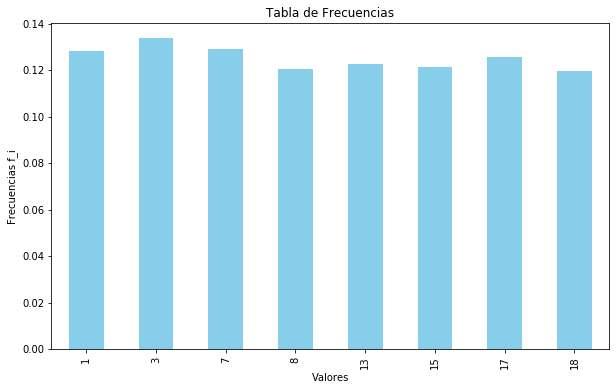

In [20]:
# Plot de la tabla de frecuencias
plt.figure(figsize=(10, 6))
tabla_frec.plot(kind='bar', color='skyblue')
plt.title('Tabla de Frecuencias')
plt.xlabel('Valores')
plt.ylabel('Frecuencias f_i')
plt.show()

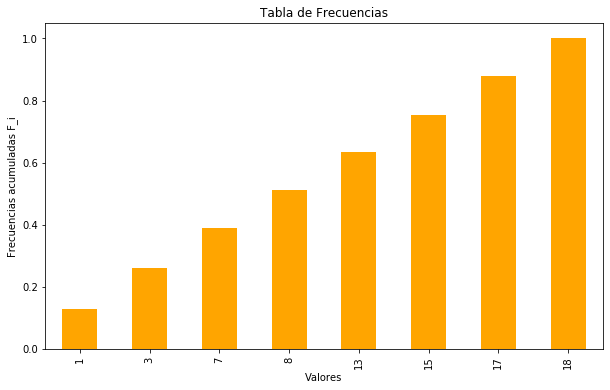

In [31]:
# Plot de la tabla de frecuencias acumuladas

plt.figure(figsize=(10, 6))
tabla_frec_acum.plot(kind='bar', color='orange')
plt.title('Tabla de Frecuencias')
plt.xlabel('Valores')
plt.ylabel('Frecuencias acumuladas F_i')
plt.show()

In [26]:
# Comparamos la media, la varianza y la desviación estándar teóricas y empíricas

print(f"Media muestral (empírica): {np.mean(datos)}, Esperanza: {media_X}")
print(f"Varianza muestral (empírica) : {np.var(datos)}, Varianza: {var_X}")
print(f"Desv. típica muestral: {np.std(datos)}, Desv. típica: {dt_X}")

# Cuantiles (25th, 50th, 75th percentiles)
Q = np.quantile(datos, [0.25, 0.5, 0.75])
print("Cuartiles (empíricos) (25%, 50%, 75%):", Q)

# Percentiles teóricos
percentiles = np.array([percentile(0.25), percentile(0.5), percentile(0.75)])
print("Cuartiles teóricos (25%, 50%, 75%):", percentiles)

Media muestral (empírica): 10.0956, Esperanza: 10.25
Varianza muestral (empírica) : 36.50006064000001, Varianza: 36.1875
Desv. típica muestral: 6.041528005397311, Desv. típica: 6.015604707757983
Cuartiles (empíricos) (25%, 50%, 75%): [ 3.  8. 15.]
Cuartiles teóricos (25%, 50%, 75%): [ 3  8 15]


<h2> Otros modos interesantes de generar una pmf (y simularla)</h2>
    
*  Generamos la pfm de una moneda usando la función <strong>Pmf</strong> de <strong> empiricaldist</strong>:   

In [33]:
moneda = Pmf()
moneda['Cara'] = 1/2
moneda['Cruz'] = 1/2
moneda

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,probs
Cara,0.5
Cruz,0.5


Ahora definimos la función <strong> tomar_muestras </strong> usando <strong>random.choice</strong>: 

In [34]:
def tomar_muestras(pmf, n):
    return random.choices(
        population=list(pmf.keys()),
        weights=list(pmf.values),
        k=n
    )
datos=tomar_muestras(moneda, 50)
datos

['Cruz',
 'Cara',
 'Cara',
 'Cruz',
 'Cara',
 'Cruz',
 'Cara',
 'Cara',
 'Cruz',
 'Cara',
 'Cara',
 'Cara',
 'Cruz',
 'Cara',
 'Cara',
 'Cara',
 'Cara',
 'Cruz',
 'Cara',
 'Cruz',
 'Cara',
 'Cruz',
 'Cara',
 'Cara',
 'Cruz',
 'Cruz',
 'Cara',
 'Cruz',
 'Cruz',
 'Cruz',
 'Cara',
 'Cruz',
 'Cara',
 'Cruz',
 'Cara',
 'Cara',
 'Cara',
 'Cruz',
 'Cruz',
 'Cruz',
 'Cara',
 'Cara',
 'Cara',
 'Cruz',
 'Cara',
 'Cruz',
 'Cara',
 'Cara',
 'Cruz',
 'Cara']

Ahora calculamos las frecuencias a partir de las muestras tomadas, y las dibujamos:

In [35]:
# Frecuencias relativas y acumuladas (de los datos)

tabla_frec = pd.Series(datos).value_counts(normalize=True).sort_index()
tabla_frec_acum = tabla_frec.cumsum()

print("Frecuencias f_i:") 
print(tabla_frec)

print("Frecuencias acumuladas F_i:")
print(tabla_frec_acum)

Frecuencias f_i:
Cara    0.58
Cruz    0.42
dtype: float64
Frecuencias acumuladas F_i:
Cara    0.58
Cruz    1.00
dtype: float64


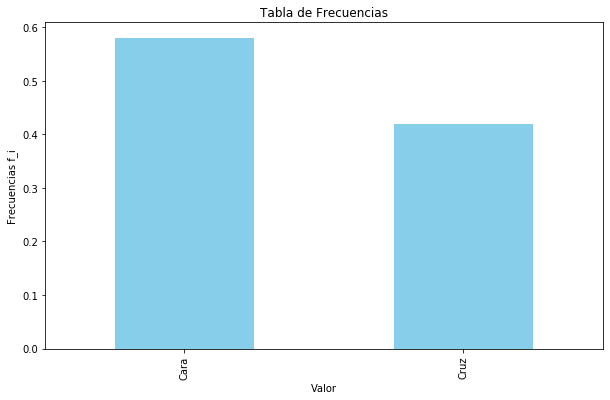

In [36]:
# Plot de la tabla de frecuencias
plt.figure(figsize=(10, 6))
tabla_frec.plot(kind='bar', color='skyblue')
plt.title('Tabla de Frecuencias')
plt.xlabel('Valor')
plt.ylabel('Frecuencias f_i')
plt.show()

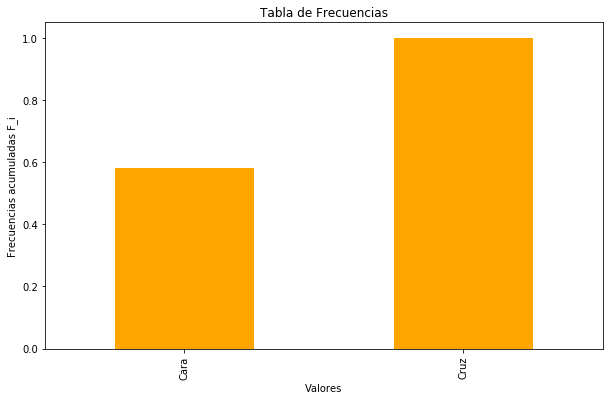

In [37]:
# Plot de la tabla de frecuencias acumuladas

plt.figure(figsize=(10, 6))
tabla_frec_acum.plot(kind='bar', color='orange')
plt.title('Tabla de Frecuencias')
plt.xlabel('Valores')
plt.ylabel('Frecuencias acumuladas F_i')
plt.show()

Otra forma de definir una pmf es usando <strong> Pmf.from_seq</strong>:

In [38]:
dado = Pmf.from_seq([1,2,3,4,5,6]) 
dado

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [80]:
dado[1]

0.16666666666666666

In [62]:
datos=tomar_muestras(dado, 50)
datos

[5,
 1,
 3,
 5,
 4,
 1,
 1,
 4,
 5,
 4,
 5,
 4,
 6,
 1,
 5,
 4,
 5,
 3,
 5,
 5,
 2,
 6,
 2,
 3,
 2,
 2,
 4,
 2,
 5,
 4,
 6,
 6,
 1,
 1,
 2,
 6,
 4,
 6,
 4,
 6,
 3,
 2,
 4,
 2,
 2,
 2,
 6,
 1,
 2,
 4]

In [63]:
# Frecuencias relativas y acumuladas (de los datos)

tabla_frec = pd.Series(datos).value_counts(normalize=True).sort_index()
tabla_frec_acum = tabla_frec.cumsum()

print("Frecuencias f_i:") 
print(tabla_frec)

print("Frecuencias acumuladas F_i:")
print(tabla_frec_acum)

Frecuencias f_i:
1    0.14
2    0.22
3    0.08
4    0.22
5    0.18
6    0.16
dtype: float64
Frecuencias acumuladas F_i:
1    0.14
2    0.36
3    0.44
4    0.66
5    0.84
6    1.00
dtype: float64


In [64]:
# Frecuencias relativas y acumuladas (de los datos)

tabla_frec = pd.Series(datos).value_counts(normalize=True).sort_index()
tabla_frec_acum = tabla_frec.cumsum()

print("Frecuencias f_i:") 
print(tabla_frec)

print("Frecuencias acumuladas F_i:")
print(tabla_frec_acum)

Frecuencias f_i:
1    0.14
2    0.22
3    0.08
4    0.22
5    0.18
6    0.16
dtype: float64
Frecuencias acumuladas F_i:
1    0.14
2    0.36
3    0.44
4    0.66
5    0.84
6    1.00
dtype: float64


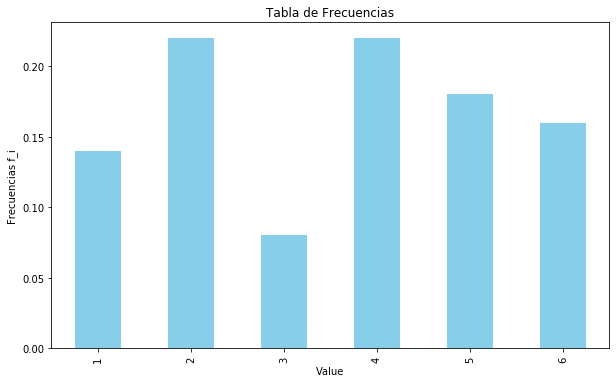

In [66]:
# Plot de la tabla de frecuencias
plt.figure(figsize=(10, 6))
tabla_frec.plot(kind='bar', color='skyblue')
plt.title('Tabla de Frecuencias')
plt.xlabel('Value')
plt.ylabel('Frecuencias f_i')
plt.show()

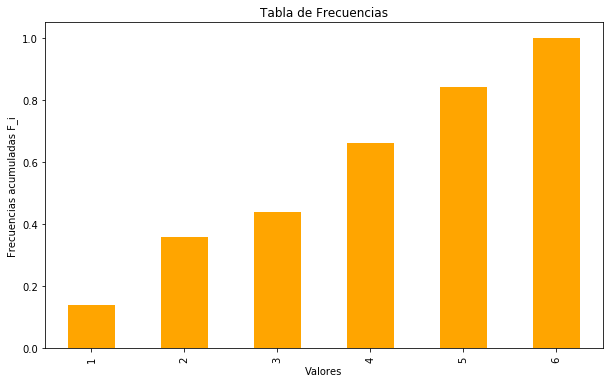

In [67]:
# Plot de la tabla de frecuencias acumuladas

plt.figure(figsize=(10, 6))
tabla_frec_acum.plot(kind='bar', color='orange')
plt.title('Tabla de Frecuencias')
plt.xlabel('Valores')
plt.ylabel('Frecuencias acumuladas F_i')
plt.show()

Se observan frecuencias muy distintas... ¡Eso es porque hemos tirado muy pocas veces los dados!. Volvamos a hacerlo, pero con 10000 tiradas:

In [69]:
datos=tomar_muestras(dado, 10000)
# Frecuencias relativas y acumuladas (de los datos)

tabla_frec = pd.Series(datos).value_counts(normalize=True).sort_index()
tabla_frec_acum = tabla_frec.cumsum()

print("Frecuencias f_i:") 
print(tabla_frec)

print("Frecuencias acumuladas F_i:")
print(tabla_frec_acum)

Frecuencias f_i:
1    0.1671
2    0.1656
3    0.1688
4    0.1674
5    0.1613
6    0.1698
dtype: float64
Frecuencias acumuladas F_i:
1    0.1671
2    0.3327
3    0.5015
4    0.6689
5    0.8302
6    1.0000
dtype: float64


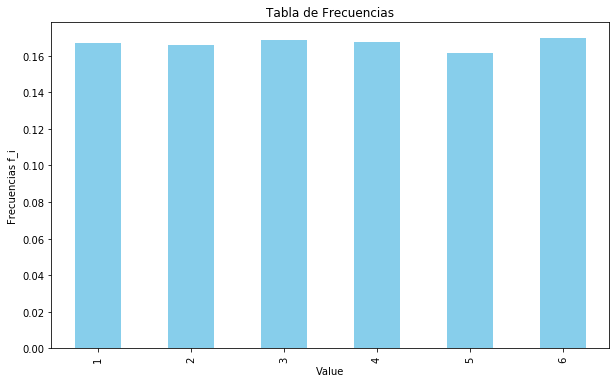

In [70]:
# Plot de la tabla de frecuencias
plt.figure(figsize=(10, 6))
tabla_frec.plot(kind='bar', color='skyblue')
plt.title('Tabla de Frecuencias')
plt.xlabel('Value')
plt.ylabel('Frecuencias f_i')
plt.show()

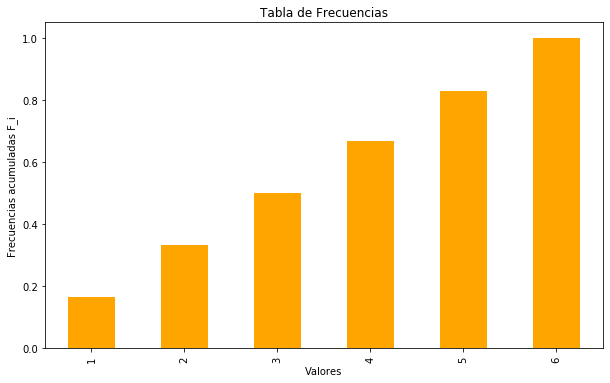

In [71]:
# Plot de la tabla de frecuencias acumuladas

plt.figure(figsize=(10, 6))
tabla_frec_acum.plot(kind='bar', color='orange')
plt.title('Tabla de Frecuencias')
plt.xlabel('Valores')
plt.ylabel('Frecuencias acumuladas F_i')
plt.show()

Otro ejemplo, <font color='blue'> calcular pmf asociada a las letras que aparecen en un texto</font>:

In [74]:
letras = Pmf.from_seq(list('mississippi is a long river of USA and Tom Sawyer loves it')) 
letras

,probs
,0.189655
A,0.017241
S,0.034483
T,0.017241
U,0.017241
a,0.051724
d,0.017241
e,0.051724
f,0.017241
g,0.017241


In [75]:
letras['A']

0.017241379310344827

In [76]:
letras[' ']

0.1896551724137931

In [77]:
datos=tomar_muestras(letras, 50)
datos

['T',
 'S',
 'r',
 'e',
 'd',
 'd',
 'm',
 'i',
 'e',
 ' ',
 'r',
 'l',
 's',
 'm',
 's',
 ' ',
 'o',
 'f',
 'p',
 'r',
 ' ',
 'a',
 'w',
 'e',
 'i',
 'A',
 'S',
 'r',
 ' ',
 ' ',
 'l',
 't',
 's',
 ' ',
 'l',
 's',
 'p',
 'p',
 'w',
 'a',
 'd',
 ' ',
 ' ',
 'r',
 's',
 'o',
 's',
 'o',
 'l',
 'n']

In [78]:
# Frecuencias relativas y acumuladas (de los datos)

tabla_frec = pd.Series(datos).value_counts(normalize=True).sort_index()
tabla_frec_acum = tabla_frec.cumsum()

print("Frecuencias f_i:") 
print(tabla_frec)

print("Frecuencias acumuladas F_i:")
print(tabla_frec_acum)

Frecuencias f_i:
     0.16
A    0.02
S    0.04
T    0.02
a    0.04
d    0.06
e    0.06
f    0.02
i    0.04
l    0.08
m    0.04
n    0.02
o    0.06
p    0.06
r    0.10
s    0.12
t    0.02
w    0.04
dtype: float64
Frecuencias acumuladas F_i:
     0.16
A    0.18
S    0.22
T    0.24
a    0.28
d    0.34
e    0.40
f    0.42
i    0.46
l    0.54
m    0.58
n    0.60
o    0.66
p    0.72
r    0.82
s    0.94
t    0.96
w    1.00
dtype: float64


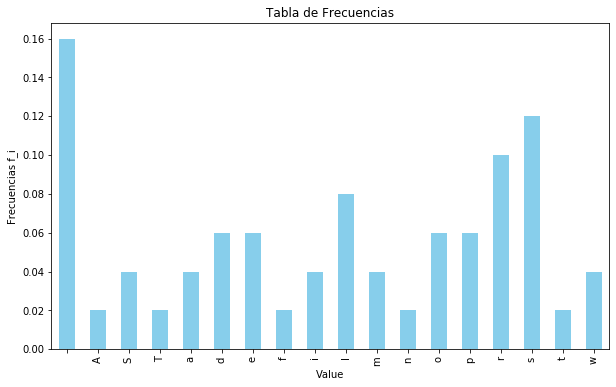

In [79]:
# Plot de la tabla de frecuencias
plt.figure(figsize=(10, 6))
tabla_frec.plot(kind='bar', color='skyblue')
plt.title('Tabla de Frecuencias')
plt.xlabel('Value')
plt.ylabel('Frecuencias f_i')
plt.show()

<font color="blue"> 2. Una baraja tiene 40 cartas. Cada carta tiene un número del 1 al 10 y un palo. (Oros, Bastos, Copas, Espadas). Saco una carta y me interesa 
      $$X = Número\ de\ la\ carta. $$ 
Analiza la variable. Calcula la probabilidad de que si saco dos cartas (una detrás de otra y distintas) al menos una de ellas sea mayor que 8.<font>

<strong> Solución: </strong> Comenzamos con el análisis de la variable. 

La variable solo toma valores entre 1 y 10:

In [20]:
val=np.array([1,2,3,4,5,6,7,8,9,10])

Como todos los números aparecen el mismo número de veces en la baraja (una por palo), todos son equiprobables

In [21]:
prob=np.array([1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10])

También podríamos haber hecho el cálculo: $P(X=i)=\frac{4}{40}$, $i=1,\cdots,10$. La variable es, por tanto, uniforme.  Esto permite definir la función de probablidad de masas y, de igual modo, la función de distribución:

In [22]:
def f(x):
    return np.sum(prob[val == x])
f_vec=np.vectorize(f)

In [23]:
def F(x):
    return np.sum(prob[val <= x])
F_vec = np.vectorize(F)

Ahora las pintamos ambas. Primero pintamos la función densidad de probabilidad f:

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


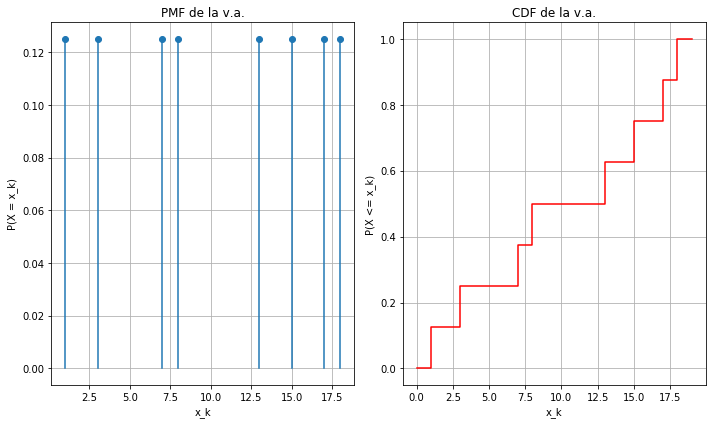

In [81]:
# Plot PMF
plt.figure(figsize=(10, 6))

# Plot PMF
plt.subplot(1, 2, 1)
plt.stem(val, f_vec(val),basefmt=" ")
plt.title("PMF de la v.a.")
plt.xlabel("x_k")
plt.ylabel("P(X = x_k)")
plt.grid(True)

# Plot CDF
plt.subplot(1, 2, 2)
x_vals = np.array([min(val)-1, *val, max(val)+1])  # Auxiliary variable for extended range
plt.step(x_vals, F_vec(x_vals), where='post', color='r', linestyle='-')
plt.title("CDF de la v.a.")
plt.xlabel("x_k")
plt.ylabel("P(X <= x_k)")
plt.grid(True)

# Mostramos los gráficos

plt.tight_layout()
plt.show()

A continuación, pintamos la función de distribución F:

In [25]:
# Cálculo de la media (o esperanza)
media_X = np.sum(val * f_vec(val))
print("Media :", media_X)

# Cálculo de la varianza 
var_X = np.sum((val - media_X)**2 * f_vec(val))
print("Varianza :", var_X)

# Cálculo de la desviación típica
dt_X = np.sqrt(var_X)
print("Desviación típica :", dt_X)

Media : 5.5
Varianza : 8.25
Desviación típica : 2.8722813232690143


In [26]:
# Función que calcula los percentiles

def percentile(p):
    for a in val:
        if F(a) >= p:
            return a
percentile_vec = np.vectorize(percentile)
Q1,Q2,Q3=percentile_vec([0.25,0.5,0.75])
[Q1,Q2,Q3]

[3, 5, 8]

Respondemos ahora a la última pregunta del ejercicio: Calcular la probabilidad de que si saco dos cartas (una detrás de otra y distintas) al menos una de ellas sea mayor que 8.

Llamemos $X_1,X_2$ a los resultados primero y segundo. Queremos calcular la probabilidad de
$A\equiv  \{X_1>8\}\cup\{X_2>8\}$
Este suceso lo podemos particionar como la unión disjunta
de los sucesos:
$$B_1\equiv  \{X_1\leq 8\} \cap\{X_2>8\}$$
$$B_2\equiv  \{X_1> 8\} \cap\{X_2\leq 8\}$$
$$B_3\equiv  \{X_1> 8\} \cap\{X_2>8\}$$
Las probabilidades de esos sucesos se calculan usando la fórmula
$$P(A\cap B) = P(A|B)P(B) = P(B|A)P(A)$$
Por tanto:
$$
P(A) =  P(B_1)+P(B_2)+P(B_3)
 = (32/40)\cdot(8/39) +(8/40)\cdot(32/39)+(8/40)\cdot (7/39)
$$
Hacemos el cómputo con Python:

In [27]:
PA=(32/40)*(8/39)+(8/40)*(32/39)+(8/40)*(7/39)
PA

0.3641025641025641

<font color="blue"> 3. Lanzamos dos dados (o, equivalentemente, lanzamos un dado dos veces) y anotamos los resultados 
    $$\Omega=\{(a,b):1\leq a,b\leq 6\}$$ 
(se supone que todos ellos son equiprobables). Se pueden entonces considerar varias variables aleatorias asociadas a este experimento aleatorio:</font>
<font color="blue"> 
* $X=$ resultado del primer lanzamiento. $Y=$ resultado del segundo lanzamiento. 
* $Z=X+Y$, $W=X-Y$
* $R=\min\{X,Y\}$
* $S=\max\{X,Y\}$
* $T=XY$

Cada una de esas variables tendrá su propia distribución de probabilidad. Por ejemplo, para la variable aleatoria $Z=X+Y$ se puede comprobar fácilmente que 
    $$\begin{array}{llllll} 
    P(Z=2) &=& \frac{1}{36} \\
    P(Z=3) &=& \frac{2}{36} \\
    P(Z=4) &=& \frac{3}{36} \\
    P(Z=5) &=& \frac{4}{36} \\
    P(Z=6) &=& \frac{5}{36} \\
    P(Z=7) &=& \frac{6}{36} \\
    P(Z=8) &=& \frac{5}{36} \\
    P(Z=9) &=& \frac{4}{36} \\
    P(Z=10) &=& \frac{3}{36} \\
    P(Z=11) &=& \frac{2}{36} \\
    P(Z=12) &=& \frac{1}{36} \end{array}$$

Veamos cómo trabajar con Python el estudio de esta variable aleatoria: Esta variable toma valores en 
$\{2,3,\cdots, 12\}$. <font>

<font color="blue"> Estudiar esta variable. Generar 10000 muestras y comparar los datos obtenidos con las propiedades de la variable. <font>

In [82]:
# Definimos los valores que toma la v.a. y su distribución de probabilidad:

val = np.arange(2, 13, 1)  # Sequence from 2 to 12
print(val)
prob = np.array([1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36,1/36])

# Suma acumulada de la distribución de probabilidad

cumsum_prob = np.cumsum(prob)
print("Cumulative sum of probabilities:", cumsum_prob)

[ 2  3  4  5  6  7  8  9 10 11 12]
Cumulative sum of probabilities: [0.02777778 0.08333333 0.16666667 0.27777778 0.41666667 0.58333333
 0.72222222 0.83333333 0.91666667 0.97222222 1.        ]


In [83]:
# Definimos la función f(x) que calcula la suma de probabilidades para cada elemento de val
def f(x):
    return np.sum(prob[val == x])

# Vectorizamos f (para que pueda evaluarse, componente a componente, en vectores)

f_vec = np.vectorize(f)

In [84]:
# Definimos la función de distribución F(x)= P[X<=x]

def F(x):
    return np.sum(prob[val <= x])

# Vectorizamos F
F_vec = np.vectorize(F)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


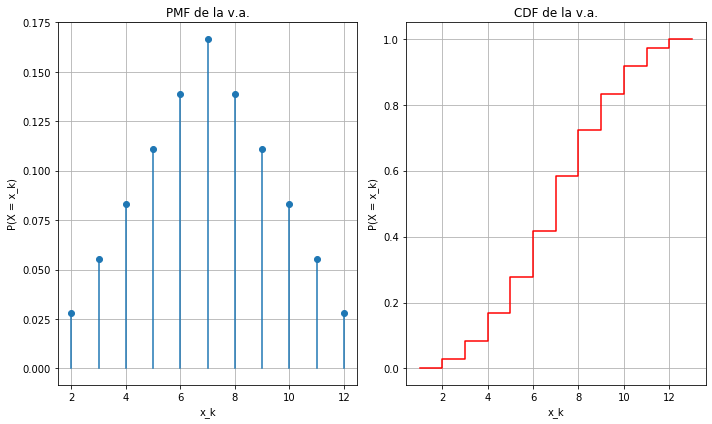

In [85]:
# Plot PMF
plt.figure(figsize=(10, 6))

# Plot PMF
plt.subplot(1, 2, 1)
plt.stem(val, f_vec(val), basefmt=" ")
plt.title("PMF de la v.a.")
plt.xlabel("x_k")
plt.ylabel("P(X = x_k)")
plt.grid(True)

# Plot CDF
plt.subplot(1, 2, 2)
x_vals = np.array([min(val)-1, *val, max(val)+1])  # Auxiliary variable for extended range
plt.step(x_vals, F_vec(x_vals), where='post', color='r', linestyle='-')
plt.title("CDF de la v.a.")
plt.xlabel("x_k")
plt.ylabel("P(X = x_k)")
plt.grid(True)

# Mostramos las gráficas:

plt.tight_layout()
plt.show()

In [86]:
def percentile(p):
    for a in val:
        if F(a) >= p:
            return a
percentile_vec = np.vectorize(percentile)

In [87]:
percentile_vec([0.25,0.5,0.75])

array([5, 7, 9])

In [88]:
# Media de X
media_X = np.sum(val * f_vec(val))
print("Media of Z:", media_X)

# Varianza de X
var_X = np.sum((val - media_X)**2 * f_vec(val))
print("Variance of Z:", var_X)

# Desviación típica de  X
dt_X = np.sqrt(var_X)
print("Standard deviation of Z:", dt_X)

Media of Z: 6.999999999999998
Variance of Z: 5.833333333333333
Standard deviation of Z: 2.41522945769824


In [90]:
# Generarmos 10000 muestras de la distribución definida por prob

datos = np.random.choice(val, size=10000, p=prob, replace=True)

# Tabla de frecuencias y su suma acumulada

tabla_frec = pd.Series(datos).value_counts(normalize=True).sort_index()
tabla_frec_acum = tabla_frec.cumsum()

print("Frecuencias f_i:") 
print(tabla_frec)

print("Frecuencias acumuladas F_i:")
print(tabla_frec_acum)

Frecuencias f_i:
2     0.0271
3     0.0561
4     0.0790
5     0.1149
6     0.1424
7     0.1716
8     0.1360
9     0.1091
10    0.0840
11    0.0526
12    0.0272
dtype: float64
Frecuencias acumuladas F_i:
2     0.0271
3     0.0832
4     0.1622
5     0.2771
6     0.4195
7     0.5911
8     0.7271
9     0.8362
10    0.9202
11    0.9728
12    1.0000
dtype: float64


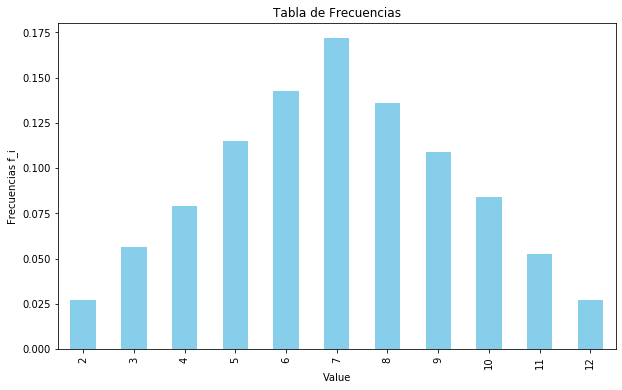

In [91]:
# Plot de la tabla de frecuencias
plt.figure(figsize=(10, 6))
tabla_frec.plot(kind='bar', color='skyblue')
plt.title('Tabla de Frecuencias')
plt.xlabel('Value')
plt.ylabel('Frecuencias f_i')
plt.show()

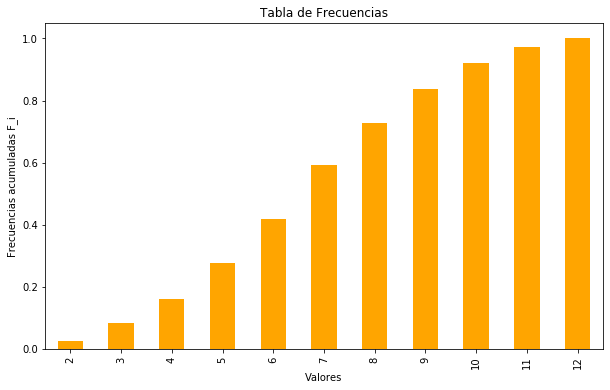

In [92]:
# Plot de la tabla de frecuencias acumuladas

plt.figure(figsize=(10, 6))
tabla_frec_acum.plot(kind='bar', color='orange')
plt.title('Tabla de Frecuencias')
plt.xlabel('Valores')
plt.ylabel('Frecuencias acumuladas F_i')
plt.show()

In [93]:
# Comparaciones:

print(f"Media muestral: {np.mean(datos)}, Media teórica: {media_X}")
print(f"Varianza muestral: {np.var(datos)}, Vairanza teórica: {var_X}")
print(f"Desv. típica muestral: {np.std(datos)}, Desv. típica teórica: {dt_X}")

# Cuantiles (25th, 50th, 75th percentiles)
Q = np.quantile(datos, [0.25, 0.5, 0.75])
print("Cuartiles empíricos (25%, 50%, 75%):", Q)

# Percentiles teóricos
percentiles = np.array([percentile(0.25), percentile(0.5), percentile(0.75)])
print("Cuartiles teóricos (25%, 50%, 75%):", percentiles)

Media muestral: 6.9835, Media teórica: 6.999999999999998
Varianza muestral: 5.737827749999999, Vairanza teórica: 5.833333333333333
Desv. típica muestral: 2.395376327427488, Desv. típica teórica: 2.41522945769824
Cuartiles empíricos (25%, 50%, 75%): [5. 7. 9.]
Cuartiles teóricos (25%, 50%, 75%): [5 7 9]


<h3>Un ejemplo interesante de v.a. discreta</h3>

<font color="brown"> Durante la II Guerra Mundial, en EEUU, hubo un momento en el que muchos reclutas tenían problemas de salud. Concretamente, la Sífilis se extendió en dicha población. Entonces fue necesario realizar análisis de sangre de forma masiva, para detectar la enfermedad. Estudiar el efecto (económico y de tiempo) que tendría realizar los análisis de sangre de forma grupal (agrupando $r$ extracciones por análisis).<font> 

Sea $q$ la prevalencia (es decir, la probabilidad de estar enfermo) en la población de reclutas. Si mezclamos la sangre de $r$ extracciones, podemos asumir que:

* Si alguno de ellos tiene Sífilis, entonces la prueba dará positivo
* La prueba dará negativo solo cuando ninguno de ellos está enfermo. Por tanto, la probabilidad de que el test resulte negativo es $p^r$, donde $p=1-q$. 

Sea  

<font color="blue"> $X_r = $ "Número de extracciones que se realizan por cada grupo de $r$ individuos, de modo que se garantice detectar todos los enfermos de ese grupo."</font>

Entonces tendremos que:

* $X_r=1$ si el análisis grupal inicial sale negativo, lo cual sucede con probabilidad $p^r$. 
* $X_r=1+r$ con probabilidad $1-p^r$,  porque si el análisis grupal inicial es positivo, entonces debemos realizar $r$ extracciones (individuales) más, con sus correspondientes análisis.
* $X_r$ solo puede tomar los valores $1$ y $1+r$.

Por tanto, $$E(X_r)=1\cdot P[X_r=1]+(r+1)\cdot P[X_r=r+1] = p^r+(r+1)(1-p^r)=1+r-rp^r$$

En el caso de que los análisis se hicieran de forma individual desde el principio, el número de análisis necesarios para estudiar los mismos r reclutas es, obviamente, r. Por tanto, se espera una mejora de $r- (1+r-rp^r)= rp^r-1$ análisis por cada $r$ individuos. En particular, al dividir por $r$ obtenemos la mejora por individuo: $p^r-1/r$. Necesitamos que esta cantidad sea positiva para poder garantizar un mejora real. De hecho, 

$$100(p^r-1/r)$$ 

representa el tanto por ciento de mejora que se espera al realizar los análisis en grupos de $r$ individuos. 


Para cada valor de $p$, buscamos  el valor de $r\in \mathbb{N}$ que optimiza la ganancia. 

Por ejemplo, para $p=0.99$ (que representa una prevalencia del $1\%$ en la población de reclusos), el siguiente cálculo nos muestra que, tomando los grupos de $11$ individuos, ¡logramos una mejora de más del $80.44\%$!  Eso fue exactamente lo que hizo el ejército norteamericano en el caso que estamos contando. 


In [39]:
p = 0.99
r = np.arange(1, 20)  
result = p**r - 1 / r
print(result)

[-0.01        0.4801      0.63696567  0.71059601  0.75099005  0.77481348
  0.78920821  0.79774469  0.80240614  0.80438208  0.80442916  0.80305154
  0.80059795  0.79731724  0.79339169  0.78895777  0.78411966  0.77895821
  0.77353704]


Es evidente que, a menor prevalencia, mayor es el ahorro que podemos lograr realizando análisis grupales (el caso extremo sería que la prevalencia es nula, por lo que un único análisis bastaría y el ahorro sería casi del 100$\%$) tomando grupos cada vez más grandes. Si la prevalencia es del $20\%$, tendremos $q=0.2$ y, por tanto, $p=0.8$. En tal caso los cálculos nos dan: 

In [40]:
p = 0.8
r = np.arange(1, 21)  
result = p**r - 1 / r
print(result)

[-0.2         0.14        0.17866667  0.1596      0.12768     0.09547733
  0.06685806  0.04277216  0.02310662  0.00737418 -0.00500974 -0.01461386
 -0.0219475  -0.02744811 -0.03148229 -0.0343525  -0.03630553 -0.03754116
 -0.03822006 -0.03847078]



Es decir, $r=3$ es el valor óptimo y el ahorro es del $17.867\%$. Aún así, supone un ahorrro significativo si la población a estudiar es grande. 

<font color="brown">Con este ejemplo debe quedar claro que un uso inteligente de las variables aleatorias puede tener gran interés económico, incluso con variables aleatorias muy sencillas.</font>